=== Accuracy global ===
Accuracy: 0.5843

=== Métricas por clase ===
 Clase  Precision  Recall  F1-Score
     0      0.203   0.160     0.179
     1      0.431   0.410     0.420
     2      1.000   1.000     1.000
     3      0.150   0.261     0.190
     4      0.388   0.472     0.426
     5      0.379   0.364     0.371
     6      0.032   0.030     0.031
     7      0.053   0.048     0.050 

=== Promedios ===
Macro  -> Precision: 0.330 | Recall: 0.343 | F1: 0.334
Weighted -> Precision: 0.584 | Recall: 0.584 | F1: 0.583

=== classification_report ===
              precision    recall  f1-score   support

           0      0.203     0.160     0.179        75
           1      0.431     0.410     0.420       305
           2      1.000     1.000     1.000       444
           3      0.150     0.261     0.190        23
           4      0.388     0.472     0.426       125
           5      0.379     0.364     0.371       220
           6      0.032     0.030     0.031        33
           

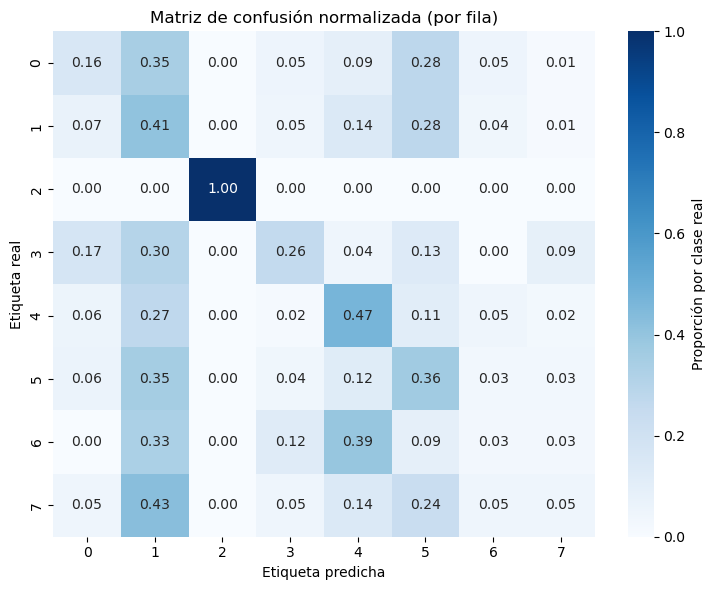

In [ ]:
# =============================================================================
# matriz de confusión y calcularcalculo de métricas 
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)

# -------------------------
# 1) Matriz de confusión (valores absolutos, según tu imagen)
#    Filas = etiqueta real, Columnas = etiqueta predicha
# -------------------------
cm = np.array([
    [12, 26, 0, 4, 7, 21, 4, 1],
    [22,125, 0,14,43, 85,12, 4],
    [ 0,  0,444, 0, 0,  0, 0, 0],
    [ 4,  7, 0, 6, 1,  3, 0, 2],
    [ 7, 34, 0, 2,59, 14, 6, 3],
    [13, 78, 0, 9,26, 80, 7, 7],
    [ 0, 11, 0, 4,13,  3, 1, 1],
    [ 1,  9, 0, 1, 3,  5, 1, 1]
], dtype=int)

classes = np.arange(cm.shape[0])  # [0..7]

# -------------------------
# 2) Reconstruir y_true / y_pred a partir de la matriz
# -------------------------
y_true, y_pred = [], []
for i in range(cm.shape[0]):          # fila = real
    for j in range(cm.shape[1]):      # col = pred
        y_true.extend([i] * cm[i, j])
        y_pred.extend([j] * cm[i, j])
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# -------------------------
# 3) Métricas
# -------------------------
acc = accuracy_score(y_true, y_pred)

prec_by_class   = precision_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
recall_by_class = recall_score(   y_true, y_pred, labels=classes, average=None, zero_division=0)
f1_by_class     = f1_score(       y_true, y_pred, labels=classes, average=None, zero_division=0)

# Promedios
prec_macro   = precision_score(y_true, y_pred, average='macro',   zero_division=0)
recall_macro = recall_score(   y_true, y_pred, average='macro',   zero_division=0)
f1_macro     = f1_score(       y_true, y_pred, average='macro',   zero_division=0)

prec_weighted   = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(   y_true, y_pred, average='weighted', zero_division=0)
f1_weighted     = f1_score(       y_true, y_pred, average='weighted', zero_division=0)

# Tabla por clase
metrics_df = pd.DataFrame({
    "Clase": classes,
    "Precision": np.round(prec_by_class, 3),
    "Recall":    np.round(recall_by_class, 3),
    "F1-Score":  np.round(f1_by_class, 3)
})

# -------------------------
# 4) Mostrar resultados
# -------------------------
print("=== Accuracy global ===")
print(f"Accuracy: {acc:.4f}\n")

print("=== Métricas por clase ===")
print(metrics_df.to_string(index=False), "\n")

print("=== Promedios ===")
print(f"Macro  -> Precision: {prec_macro:.3f} | Recall: {recall_macro:.3f} | F1: {f1_macro:.3f}")
print(f"Weighted -> Precision: {prec_weighted:.3f} | Recall: {recall_weighted:.3f} | F1: {f1_weighted:.3f}\n")

# (Opcional) Reporte tipo sklearn
print("=== classification_report ===")
print(classification_report(y_true, y_pred, zero_division=0, digits=3))

# -------------------------
# 5) Plot: matriz normalizada (% por fila)
# -------------------------
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(7.5, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=classes, yticklabels=classes,
            cbar_kws={"label": "Proporción por clase real"})
plt.title("Matriz de confusión normalizada (por fila)")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.tight_layout()
plt.show()
